# All required imports and loading of dataset

In [8]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report
import math

X = pd.read_csv("cancerdata.csv")

# Exploratory Data Analysis (EDA)

In [9]:
X

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0
...,...,...,...,...,...,...,...,...,...,...
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268,0
679,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268,0
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695,1
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268,1


In [10]:
class_0, class_1 = X['Class'].value_counts()
print(class_0)
print(class_1)

444
239


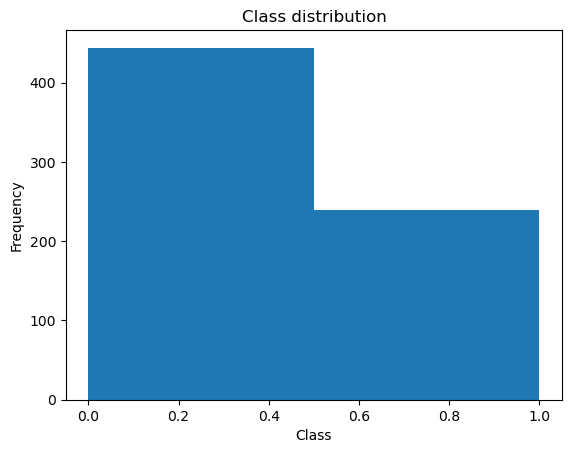

In [11]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(X['Class'],bins = 2)
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [12]:
correlation = X.corr()
correlation

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Cl.thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Cell.size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Cell.shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marg.adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Epith.c.size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare.nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bl.cromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal.nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


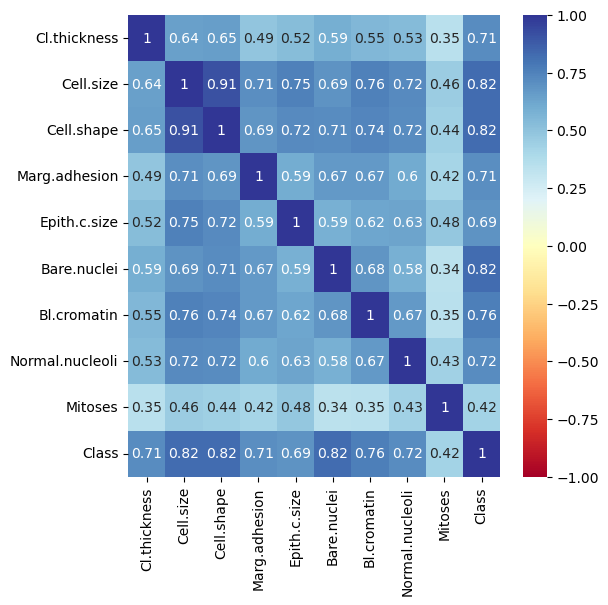

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cmap='RdYlBu', annot=True, vmax=1, vmin=-1)
plt.show()

From the correlation map it can be concluded that cell size, cell shape, and bare nuclei features have the highest correlation to the class at 0.82. Mitosis has the lowest at 0.42. After testing models with all columns and also with certain columns such as mitosis removed it was found that keeping all columns of the table obtains the best results. Threfore all columns in data are kept in this project.

# Data pre-processing and splitting

## Scaling
For this problem case, the data was required to be appropriately scaled. For the Naive Bayes (NB) model the data was required to be scaled with mean of 0 and standard devation of 1. This was achieved using sci-kit learn's preprocessing scale package. 

For the Logistic Regression (LR) model, sci-kit learn's min max scaling was used to appropriately scale the data into the format required. This means the data for the LR model is scaled between 0 and 1 to meet the requirements of the model.

In [14]:
X_scaled = sklearn.preprocessing.scale(X)

In [15]:
labels = []
extracted_col = X["Class"]
extracted_col
labels.append(extracted_col)
labels = np.reshape(labels, (683))

In [16]:
X_NB = X_scaled[:,0:9]
X_NB

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [17]:
X_logreg = X.loc[:,["Cl.thickness" ,"Cell.size",  "Cell.shape", "Marg.adhesion", "Epith.c.size", "Bare.nuclei", "Bl.cromatin", "Normal.nucleoli", "Mitoses"]]
X_logreg

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268
...,...,...,...,...,...,...,...,...,...
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268
679,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268


In [18]:
from sklearn.preprocessing import MinMaxScaler
cols = X_logreg.columns
norm = MinMaxScaler()
X_norm = norm.fit_transform(X_logreg)
X_norm = pd.DataFrame(X_norm, columns = cols)
X_norm.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


## Data Splitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_NB, labels, test_size=0.33, random_state=42)

In [20]:
X_trai, X_tes, y_trai, y_tes = train_test_split(X_norm, labels, test_size=0.33, random_state=42)

# Model training and evaluation

Naive Bayes (NB):
    
    Bayesian classifiers are statistical classifiers that can predict the probability of a given data sample belonging to a particular class. These could be binary or multi-class classification probelms, however, the problem case of this project requires Bayesian classifiers for binary classification. They are based on Bayes' Theorem. 
    Bayesian classifiers assume that the effect an attribute value has on it's given class is independent of values of other attributes. This assumption is referred to as class conditional independence. NB classsifiers are referred to as Naive as a result of this assumption.
    To predict the which class each data point belongs to based on it's properties two things are needed:
        -The prior probability of data point c belonging to class k 

$$p(c_{k})$$
        
        -The likelihood of i assuming that i belongs to class k
$$p(x_{i}|c_{k})$$
    
    Using Bayes rule
    
$$ p(c_{k}|x_{i}) = \frac{p(x_{i}|c_{k})p(c_{k})}{p(x_{i})} $$
    
    x(i) is known therefore it can be considered fixed. hence:
    
$$ p(c_{k}|x_{i}) ∝ p(x_{i}|c_{k})p(c_{k}) $$

    As a result of the class conditional independence assumption, if x(i) is a vector with multiple features then:
    
$$p(x_{i,1},x_{i,2},...,x_{i,p}|c_{k}) = \prod \limits _{j=1} ^{p} p(x_{i,j}|c_{k})$$
    
    NB models use MAP(Maximum A Poseterior) as their method/function for parameter estimation. 
    Model Choices: there are different types NB models all suited for different problems. These include BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, and MultinomialNB. As this problem case is a binary classificaion problem, the two types of NB models suitable for the problem case are complementNB and BernoulliNB. Both of these models will be trained and evaluated and the model with the higher accuracy will be selected to be compared with the Logistic Regresion Model. 

Logistic Regression (LR):

    Logistic Regression(LR) is a linear model used for binary or multiclass classification. In linear models, one or more independent variables describe the relationship to a dependent (response) variable. In the problem case of this project the features are the independent variables and the class is the dependent (response) variable. In LR, the response variable is the log value of the odds being classified as either 0 or 1. 
    For Logistic Regression Y is modeled as:
    
$$P(Y=1|X)$$

    A function called sigmoid is used to constraint the probabilities between 0 and 1. This is the probability of the input belonging to a particular class.
    
$$ odds = \frac{px}{1-px}$$

$$log odds(logit) = log(\frac{px}{1-px})$$

    The assumptions made for a logistic regression model are as followed. Similarly to NB, LR also assumes indepdence between features, the probability output is between 0 and 1 and the features follow a Bernoulli distrubution.
    
    LR model for a vinary response can be expressed as the following:
    
$$p(y^{(i)} = 1|x^{(i)},w) = 1 - \frac{1}{1+e^{(w^{T}x^{(i)}+b)}} $$
   
$$p(y^{(i)} = 0|x^{(i)},w) = 1 - \frac{1}{1+e^{(w^{T}x^{(i)}+b)}} $$
    
    w = weight, b = bias term. The goal is to find a set of weights which minimise the negative loglikelihood. This would essentially mean maximising the loglikelihood which would mean maximising the probability of selecting the correct class.
    In this problem case the output of the LR model would be 2 probabilities for each data point. These would be reffereing to the probability of the data point belonging to either class 0 or 1. We can use these two values to pick the class with the highest probability as the prediction of the LR model. 


## Accuracy

Accuracy is a measure of the percentage of the total number of correct predictions (TP + TN) over the total number of predictions.

In [21]:
nbclassifier = ComplementNB()
nbclassifier.fit(X_trai,y_trai).score(X_tes,y_tes)

0.8849557522123894

In [22]:

nbclassifier1 = BernoulliNB()
nbclassifier1.fit(X_train,y_train).score(X_test,y_test)

0.9734513274336283

In [23]:
y_pred_NB = nbclassifier1.predict(X_test)

In [24]:
log_reg = LogisticRegression(solver="liblinear", random_state=42, multi_class = 'ovr')
log_reg.fit(X_trai, y_trai).score(X_tes, y_tes)

0.9513274336283186

From the accuracy metric we can derive that the NB model slightly outperforms the LR model in this problem case. Both of these models have a really good performance for this problem case.

In [25]:
y_predicted = log_reg.predict_proba(X_tes)

In [26]:
decision_boundar = []

for i in range(len(y_predicted)):
    if y_predicted[i][0] > y_predicted[i][1]:
        decision_boundar.append(0)
    elif y_predicted[i][1] > y_predicted[i][0]:
        decision_boundar.append(1)
        
decision_boundar

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

## Feature Importance

Feature: 0, Score: -0.1510
Feature: 1, Score: -0.1436
Feature: 2, Score: -0.1218
Feature: 3, Score: -0.2121
Feature: 4, Score: -0.3113
Feature: 5, Score: -0.1584
Feature: 6, Score: -0.2042
Feature: 7, Score: -0.2441
Feature: 8, Score: -0.8221


C:\Users\Reza Yaghoobi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


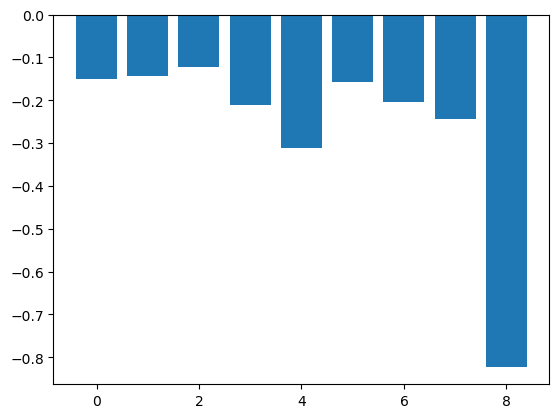

In [27]:
importance_NB = nbclassifier1.coef_[0]
for i,v in enumerate(importance_NB):
 print('Feature: %0d, Score: %.4f' % (i,v))
plt.bar([x for x in range(len(importance_NB))], importance_NB)
plt.show()


Feature: 0, Score: 1.6584
Feature: 1, Score: 1.4992
Feature: 2, Score: 1.6236
Feature: 3, Score: 1.1937
Feature: 4, Score: 0.1538
Feature: 5, Score: 2.8987
Feature: 6, Score: 1.3309
Feature: 7, Score: 1.3689
Feature: 8, Score: 0.9684


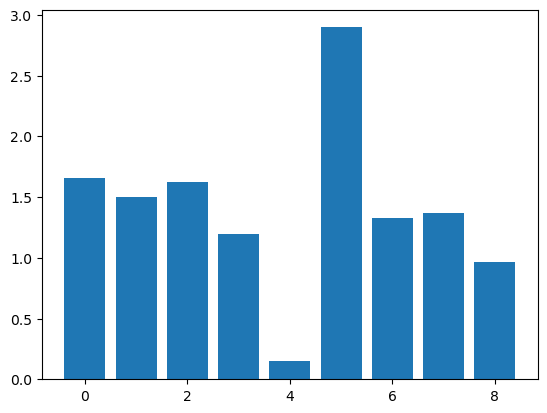

In [28]:
importance = log_reg.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.4f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Confusion Matrix

Confusion Matrix is another performance measure for Machine Learning models. It consists of a table with 4 different combinations of predicted and actual values. There is plots of this table for both the models below.

In [29]:
from sklearn import metrics
metrics.confusion_matrix(y_test,  y_pred_NB)

array([[140,   2],
       [  4,  80]], dtype=int64)

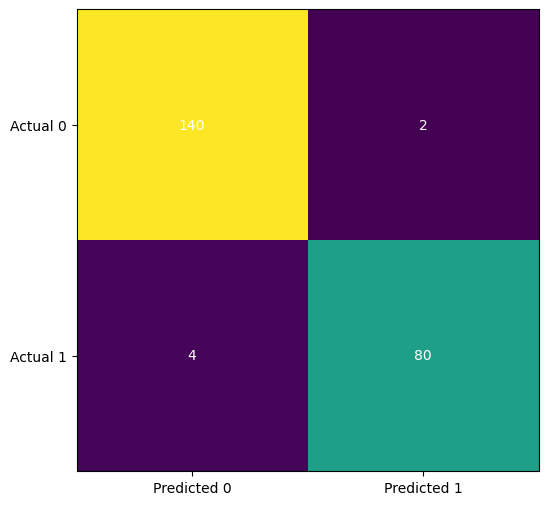

In [30]:
conf_matrix_NB = metrics.confusion_matrix(y_test, y_pred_NB)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(conf_matrix_NB)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix_NB[i, j], ha='center', va='center', color='white')
plt.show()

In [31]:
from sklearn import metrics
metrics.confusion_matrix(y_tes, decision_boundar)

array([[140,   2],
       [  9,  75]], dtype=int64)

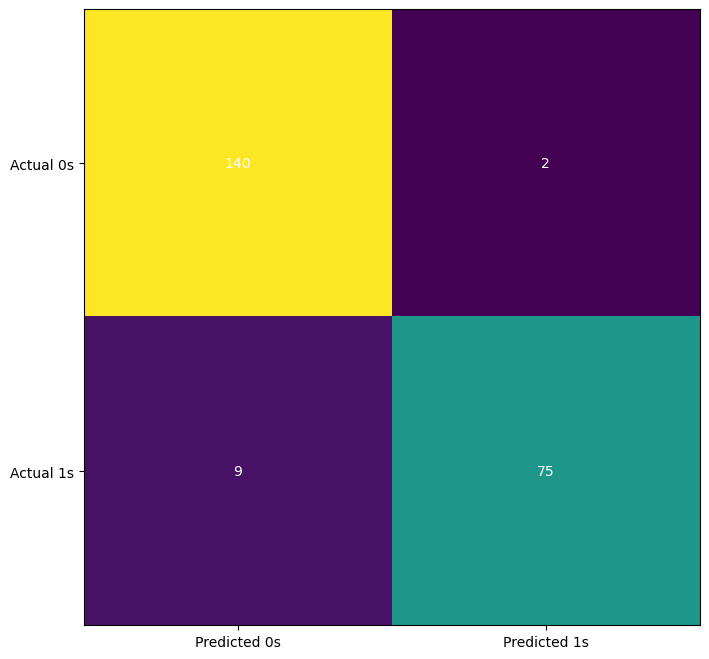

In [32]:
conf_matrix_LR = metrics.confusion_matrix(y_tes, decision_boundar)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix_LR)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix_LR[i, j], ha='center', va='center', color='white')
plt.show()

From the confusion matrix we can conclude that the NB model is better performing, especially at predicting actual data belonging to class 1(breast cancer). This is showcased by the slight better performance on the actual and predicted 1s. 

## Precision, Recall and f1-score
**Precision** is a measure of the ratio of true positives compared to the total number of positive predictions (true positive + false positive).

**Recal** is a measure of the ratio of the positive cases correctly predicted, over all the positive cases in the data (TP + FN)

**f1-score** is a measure combining both precision and recall allowing for better evaluation of models. in order for the f1-score to increase both the precision and recall have to increase. Really high precision and low recall will result in an average f1-score, this is an example of an instance where f1-score is a more suitable metric to use than precision or recall.




In [33]:
y_true = y_test
y_pred = y_pred_NB
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       142
           1       0.98      0.95      0.96        84

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



In [34]:
y_true = y_tes
y_pred = decision_boundar
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       142
           1       0.97      0.89      0.93        84

    accuracy                           0.95       226
   macro avg       0.96      0.94      0.95       226
weighted avg       0.95      0.95      0.95       226



# ROC curve

A Receiver Operating Characteristic (ROC) curve is a graph that showcases the performance of a classication model by plotting the true positive rate (TPR) against the false positive rate (FPR).
TPR is another term describing recall and the equation looks like the following:
$$TPR = \frac{TP}{TP+FN}$$

FPR is defined as:
$$FPR = \frac{FP}{FP+TN}$$

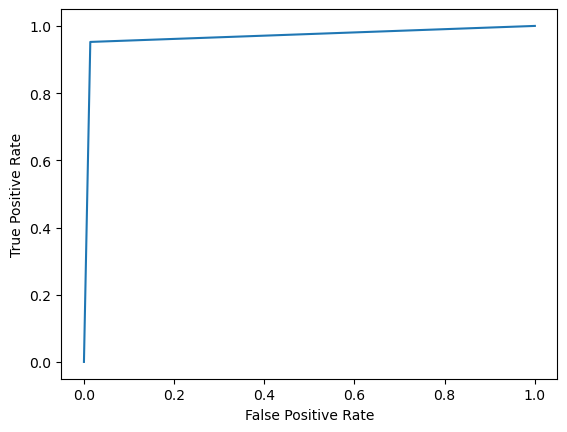

In [35]:
#define metrics
y_pred_proba_NB = y_pred_NB
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_NB)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
print(f'NB model AUC score: {sklearn.metrics.roc_auc_score(y_test,  y_pred_proba_NB)}')

NB model AUC score: 0.9691482226693494


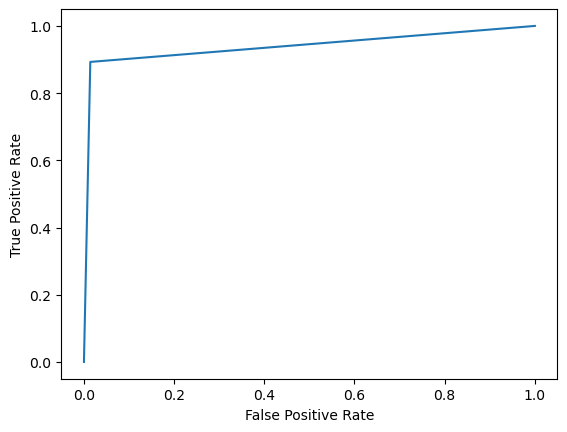

In [37]:
#define metrics
y_pred_proba = decision_boundar
fpr, tpr, _ = metrics.roc_curve(y_tes,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
print(f'LR model AUC score: {sklearn.metrics.roc_auc_score(y_tes,  y_pred_proba)}')

LR model AUC score: 0.9393863179074446


Both models performed really well. As expected again the Naive Bayes (NB) model slightly edged the Logistic Regression (LR) model in performance achieving a close to perfect AUC score of 0.9691.

## Matthews Correlation Coefficient (MCC)
Matthews Correlation Coefficient is an important metric for evaluation of models. MCC is a better metric to use compared to accuracy as it takes into account also the true positive/negative and false positive/negative. it ranges between -1 and 1 with -1 meaning there is no correlation and 1 meaning there is perfect correlation between predicted and actual data. The equation for MCC can be found below:

$$𝑀𝐶𝐶 = \frac{𝑇𝑃 𝑥 𝑇𝑁 − 𝐹𝑃 𝑥 𝐹𝑁}{(𝑇𝑃 + 𝐹𝑃)(𝑇𝑃 + 𝐹𝑁)(𝑇𝑁 + 𝐹𝑃)(𝑇𝑁+𝐹𝑁)}$$
 
    

In [39]:
y_true = y_test
y_pred = y_pred_NB
sklearn.metrics.matthews_corrcoef(y_true, y_pred)
#NB

0.9430521597641348

In [40]:
y_true = y_tes
y_pred = decision_boundar
sklearn.metrics.matthews_corrcoef(y_true, y_pred)

0.8960285409642825

From the MCC for both the models we can observe that the NB model performed better than the LR model. the advantage of using MCC for evaluating these models is showcased in this case; the accuracy of these two models was higher for both as well as the difference between the accuracy performance being much smaller. Taking into account the true positive/negative and false positive/negative numbers has enabled us to better evaluate these models by using MCC as a metric. 

## Cohen's Kappa Score
Cohen's kappa can be described as a statistic used to measure inter-rater reliability for qualitative items. Cohen's kappa takes into account the possibility of agreement occuring by chance, for this reason it is thought to be a more reliable metric than simple percentage metrics such as accuracy.

$$k = \frac{Po-Pe}{1-Pe}$$


$$Po = \frac{Number Of Predictions In Agreement(TP+TN)}{Total}$$


$$Pe = \frac{Pcorrect}{Pincorrect}$$

In [41]:
y_true = y_test
y_pred = y_pred_NB
sklearn.metrics.cohen_kappa_score(y_true, y_pred)

0.9428812131423757

In [42]:
y_true = y_tes
y_pred = decision_boundar
sklearn.metrics.cohen_kappa_score(y_true, y_pred)

0.8939872068230277

From the Cohen's Kappa Score (k) we can observe that the NB model performs significantly better than the LR model. The importance of the usage of k as an evaluation metric is highlighted here as the gap in the performance of the two models is relatively smaller when using simple percentage metrics such as accuracy in comparison to k.

# Cross Validation

In [43]:
k_fold = KFold(n_splits=5)
cross_val_score(nbclassifier1, X_test, y_test, cv=k_fold, n_jobs=-1)

array([1.        , 0.97777778, 0.95555556, 1.        , 0.97777778])

In [44]:
k_fold = KFold(n_splits=5)
cross_val_score(log_reg, X_tes, y_tes, cv=k_fold, n_jobs=-1)

array([0.97826087, 0.97777778, 0.93333333, 1.        , 0.97777778])

In [45]:
cross_nb = np.array([1.        , 0.97777778, 0.95555556, 1.        , 0.97777778])
cross_log = np.array([0.97826087, 0.97777778, 0.93333333, 1.        , 0.97777778])

print("NB cross val mean",np.mean(cross_nb))
print("NB cross val sd",np.std(cross_nb))
print("LR cross val mean",np.mean(cross_log))
print("LR cross val sd",np.std(cross_log))

NB cross val mean 0.982222224
NB cross val sd 0.01662958672270313
LR cross val mean 0.973429952
LR cross val sd 0.021793813488653533


From the cross validation conducted on the two models and obtaining the mean and standard devation of these for both the Naive Bayes and Logistic Regression models, we can conclude that the NB model is consistantly performing better than the LR model with higher mean and SD in the cross validation. It is important to note however that the highest performance by either of the models in each of their 5 validations was obtained by the LR model in it's last cross validation obtaining a score of 99.26%.


## Stratified Cross Validation (SCV)
SCV is an application of cross validation explained above, however, SCV ensure class balance within each fold which coud be seen as an advantage over cross validation for evaluating the models. 

In [46]:
sk_fold = StratifiedKFold(n_splits=5)

cross_val_score(nbclassifier1, X_test, y_test, cv=sk_fold, n_jobs=-1)

array([1.        , 0.95555556, 0.97777778, 1.        , 0.97777778])

In [47]:
sk_fold = StratifiedKFold(n_splits=5)

cross_val_score(log_reg, X_tes, y_tes, cv=sk_fold, n_jobs=-1)

array([0.97826087, 0.95555556, 0.95555556, 1.        , 0.97777778])

In [48]:
Cross_NB = np.array([1.        , 0.95555556, 0.97777778, 1.        , 0.97777778])
Cross_log = np.array([0.97826087, 0.95555556, 0.95555556, 1.        , 0.97777778])
print("NB cross val mean",np.mean(Cross_NB))
print("NB cross val sd",np.std(Cross_NB))
print("LR cross val mean",np.mean(Cross_log))
print("LR cross val sd",np.std(Cross_log))

NB cross val mean 0.982222224
NB cross val sd 0.01662958672270313
LR cross val mean 0.973429954
LR cross val sd 0.0166565098775339


The SCV results again show slight edge in performance for the NB model. This is to be expected based on previous metrics looked at. It should be noted that whilst it may seem that the SCV results are the same as the CV results, this is not the case and is shown by the difference in SD for the LR model.

# Overall Comparison
Overall it can be concluded that the NB model had a better performance regarding all metrics used in the project compared to the LR model in this problem case. However, both of these models performed really well and are suited to the problem case. Naive Bayes' slight better performance could be affected by the relatively small sample size of the dataset. Naive Bayes models are good at prediction even with relatively low sample size's, however, for Logistic Regression models this can be a disadvantage. It is important to note that these models would be better evaluated if trained and tested on larger amounts of data that has better class balance. The slight class imbalance in the data could result in an unreliable model given complex/rare data samples. This could have been mitigated by using sklearn's resample package, however, since this package was not used in the content of this module, the use of it was avoided. 
It is important to note that there were duplicate data within the dataset, however, in order to keep the integrity of the dataset, these were kept in. 